In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Loan_Default.csv", encoding = "latin-1")

In [3]:
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [8]:
data = data.drop(["Id"], axis = 1)

In [9]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [10]:
df = data.drop(columns = ["Profession", "CITY", "STATE"])

In [11]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,6,11,0
251996,2843572,26,10,single,rented,no,6,11,0
251997,4522448,46,7,single,rented,no,7,12,0
251998,6507128,45,0,single,rented,no,0,10,0


In [12]:
df["Married/Single"].unique()

array(['single', 'married'], dtype=object)

In [13]:
df["Married/Single"].value_counts()

Married/Single
single     226272
married     25728
Name: count, dtype: int64

In [14]:
df["House_Ownership"].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [15]:
df["House_Ownership"].value_counts()

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

<Axes: xlabel='House_Ownership', ylabel='count'>

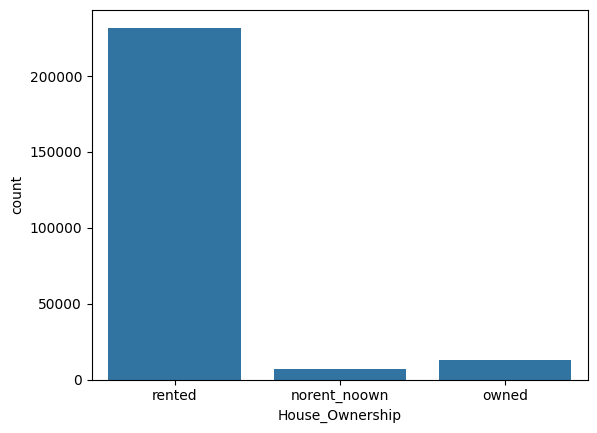

In [16]:
sns.countplot(x="House_Ownership", data = df)

In [17]:
df["Car_Ownership"].unique()

array(['no', 'yes'], dtype=object)

In [18]:
df["Car_Ownership"].value_counts()

Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64

In [19]:
lb = LabelEncoder()

df["Married/Single"] = lb.fit_transform(df["Married/Single"])
df["House_Ownership"] = lb.fit_transform(df["House_Ownership"])
df["Car_Ownership"] = lb.fit_transform(df["Car_Ownership"])

In [20]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,3,13,0
1,7574516,40,10,1,2,0,9,13,0
2,3991815,66,4,0,2,0,4,10,0
3,6256451,41,2,1,2,1,2,12,1
4,5768871,47,11,1,2,0,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,6,11,0
251996,2843572,26,10,1,2,0,6,11,0
251997,4522448,46,7,1,2,0,7,12,0
251998,6507128,45,0,1,2,0,0,10,0


In [21]:
df["Married/Single"].unique()

array([1, 0])

In [22]:
df["House_Ownership"].unique()

array([2, 0, 1])

In [23]:
df["Car_Ownership"].unique()

array([0, 1])

In [24]:
df["Risk_Flag"].unique()

array([0, 1])

In [25]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,3,13,0
1,7574516,40,10,1,2,0,9,13,0
2,3991815,66,4,0,2,0,4,10,0
3,6256451,41,2,1,2,1,2,12,1
4,5768871,47,11,1,2,0,3,14,1


<Axes: >

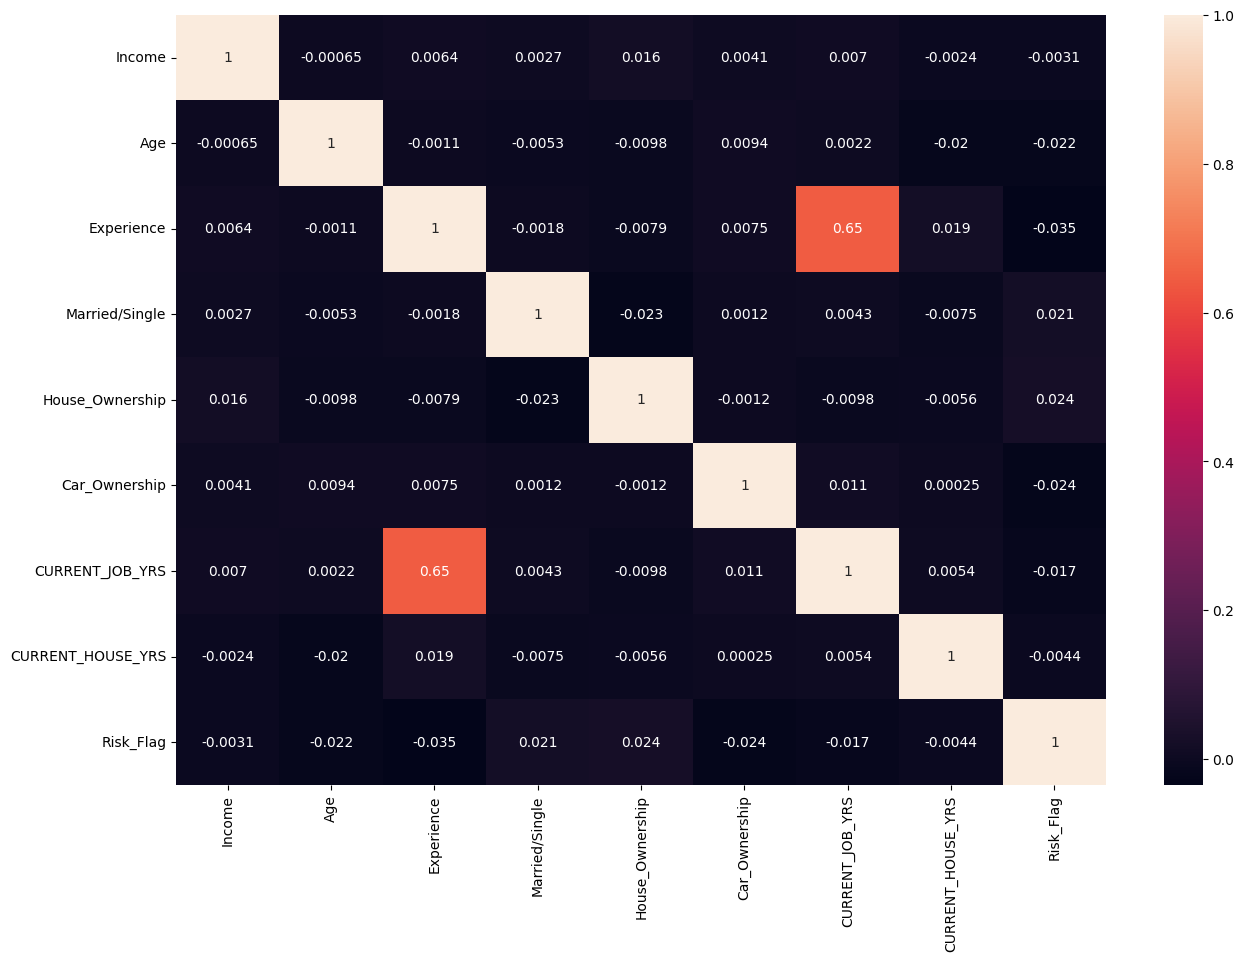

In [26]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='Risk_Flag', ylabel='count'>

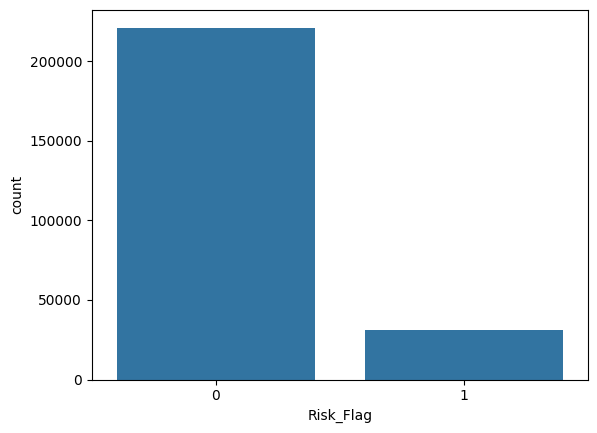

In [27]:
sns.countplot(x = "Risk_Flag", data = df)

In [28]:
df["Risk_Flag"].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

## Data Splitting 1

In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
x.shape

(252000, 8)

## Feature Selection

In [31]:
from sklearn.feature_selection import SelectKBest,f_classif
select=SelectKBest(score_func=f_classif,k=5)
z=select.fit_transform(x,y)
flt=select.get_support()
s=x.columns
print(s[flt])

Index(['Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership'],
      dtype='object')


In [32]:
x = df[['Age', 'Experience', 'Married/Single', 'House_Ownership','Car_Ownership']]

In [33]:
x

,Age,Experience,Married/Single,House_Ownership,Car_Ownership
0,23,3,1,2,0
1,40,10,1,2,0
2,66,4,0,2,0
3,41,2,1,2,1
4,47,11,1,2,0
...,...,...,...,...,...
251995,43,13,1,2,0
251996,26,10,1,2,0
251997,46,7,1,2,0
251998,45,0,1,2,0


In [34]:
sc=StandardScaler()
x = sc.fit_transform(x)

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [37]:
from sklearn.ensemble import RandomForestClassifier 

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.85      0.75     26459
           1       0.88      0.73      0.80     39843

    accuracy                           0.78     66302
   macro avg       0.78      0.79      0.78     66302
weighted avg       0.80      0.78      0.78     66302



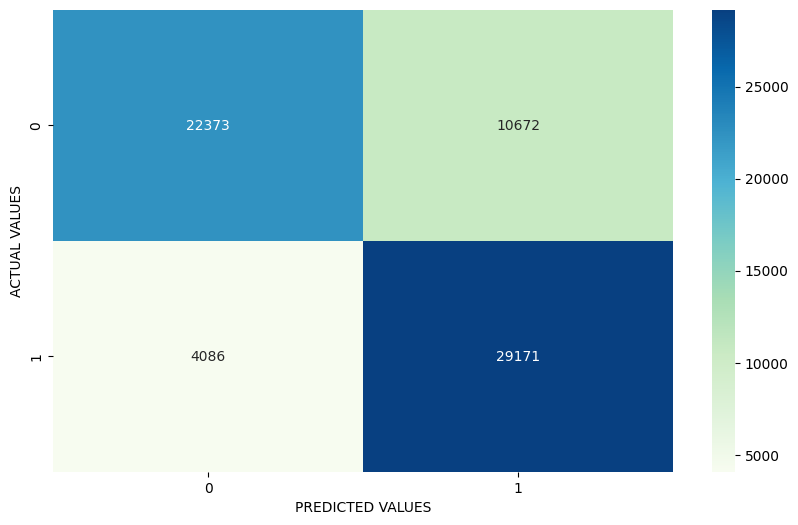

In [38]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, rf_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()